In [94]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df=pd.read_csv("/Users/namanmuktha/Desktop/mediksearch/Tel & Ap Data/completeApAUSH.csv")

In [96]:
df.head()

,COLLEGE,RANK,NEET_ROLL_NO,SCORE,SX,CAT,LOC,PHASE,EWS
0,"NRS Government Ayurvedic College, Vijayawada",88452,1213010278,521,F,BCD,AU,P1,NO
1,"NRS Government Ayurvedic College, Vijayawada",106390,1205200345,502,F,OC,AU,P1,NO
2,"NRS Government Ayurvedic College, Vijayawada",116220,2712070364,492,F,BCB,SVU,P1,NO
3,"NRS Government Ayurvedic College, Vijayawada",119753,1220030118,489,M,OC,AU,P1,NO
4,"NRS Government Ayurvedic College, Vijayawada",120672,1229010057,488,F,BCD,AU,P1,NO


In [97]:
df.isna().sum()

COLLEGE         0
RANK            0
NEET_ROLL_NO    0
SCORE           0
SX              0
CAT             0
LOC             0
PHASE           0
EWS             0
dtype: int64

array([[<Axes: title={'center': 'RANK'}>,
        <Axes: title={'center': 'NEET_ROLL_NO'}>],
       [<Axes: title={'center': 'SCORE'}>, <Axes: >]], dtype=object)

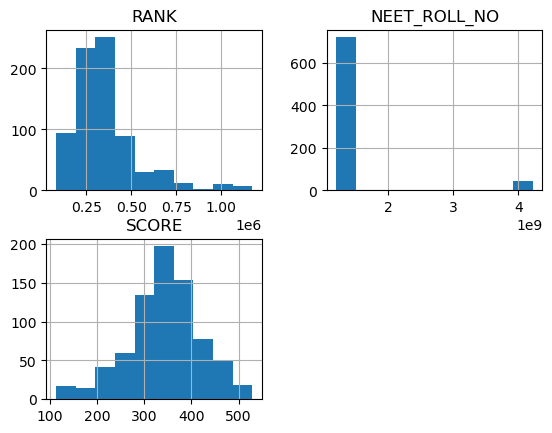

In [98]:
df.hist()

In [99]:
df["COLLEGE"].unique()

array(['NRS Government Ayurvedic College, Vijayawada',
       'Sri Adi Siva Sadguru Ali Saheb Shivaaryula Ayurvedic Medical College and Research Centre, Guntakal',
       'Sri Venkateswara Ayurvedic College, Tirupati',
       'Dr. Allu Ramalingaiah Government Homoeo Medical College, Rajahmundry',
       'Dr. Gururaj Government Homoeo Medical College, Gudivada',
       'Government Homoeo Medical College, Kadapa',
       'KKC Homoeopathy Medical College, Parameswara Mangalam, Puttur, Chittoor District.',
       'Maharaja Institute of Homoeo Medical College, Vizianagaram.',
       'Sri Adi Shiva Sadguru Ali Saheb Shivaaryula Homoeopathic Medical College, Guntakal.',
       'Dr. Abdul Haq Unani Medical College, Kurnool'], dtype=object)

In [100]:
df.nunique()

COLLEGE          10
RANK            460
NEET_ROLL_NO    460
SCORE           235
SX                2
CAT               8
LOC               4
PHASE             2
EWS               1
dtype: int64

In [101]:
df.shape

(764, 9)

In [102]:
df=df.drop(['NEET_ROLL_NO','SCORE','EWS'],axis=1)

array([[<Axes: title={'center': 'RANK'}>]], dtype=object)

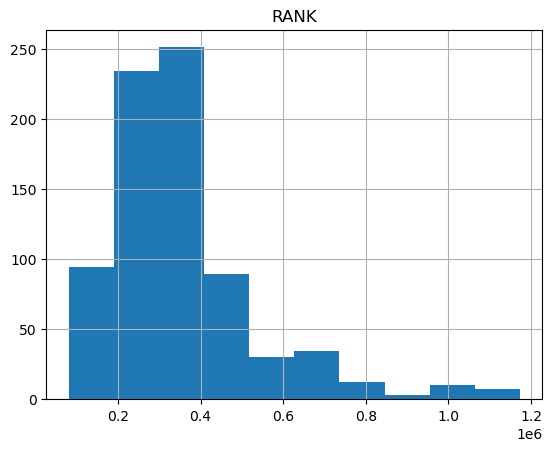

In [103]:
df.hist()

<Axes: xlabel='COLLEGE', ylabel='count'>

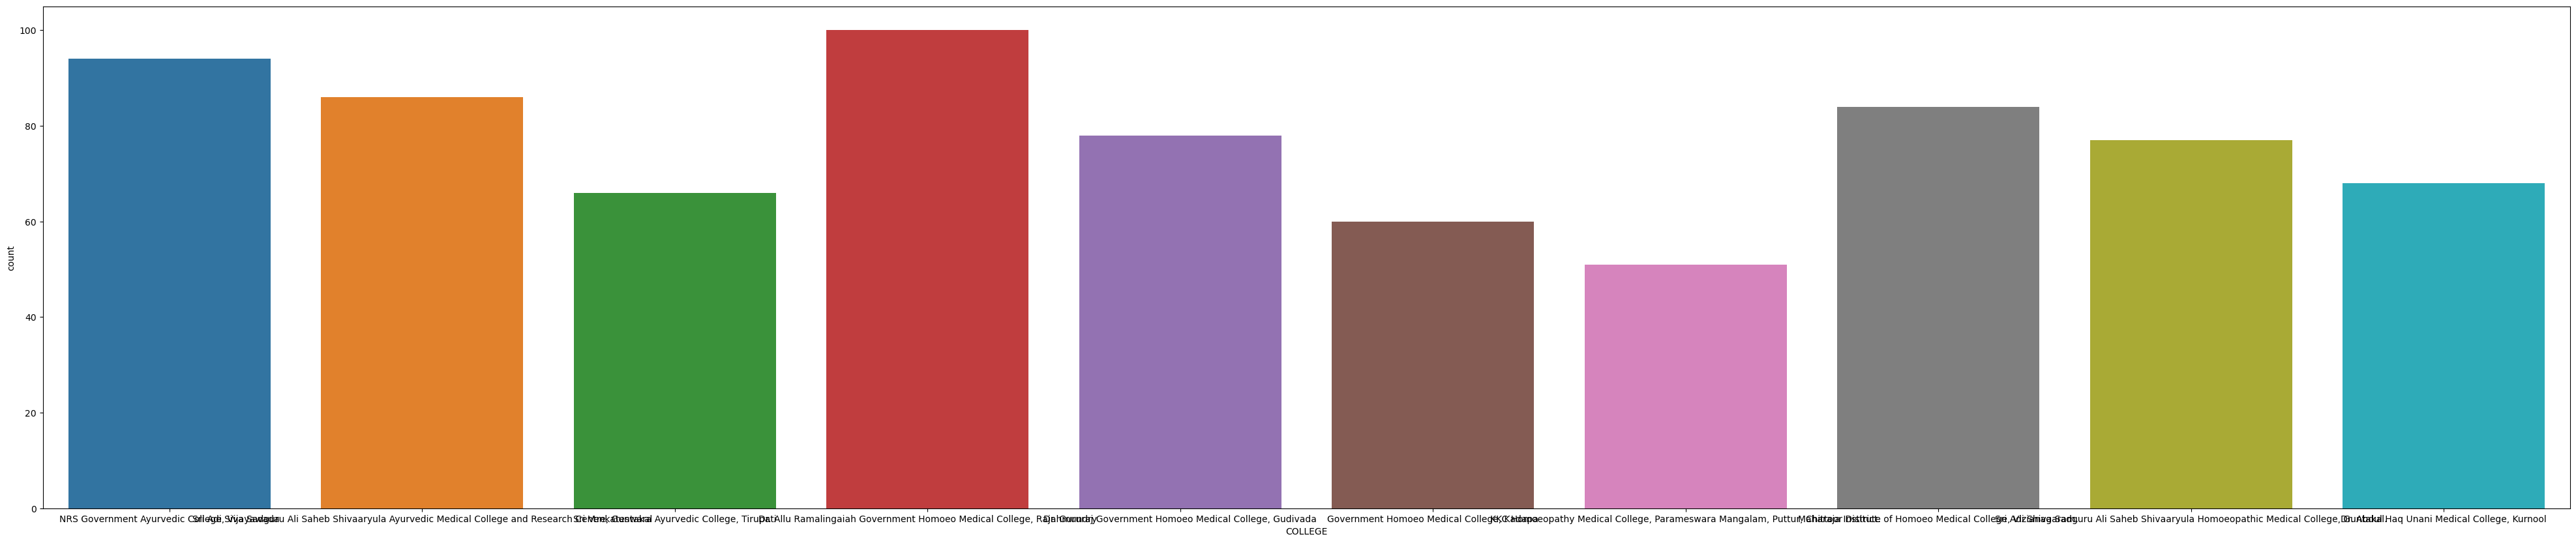

In [104]:
plt.figure(figsize=(50,10))
sns.countplot(data=df,x="COLLEGE")

In [105]:
df["PHASE"].unique()

array(['P1', 'P2'], dtype=object)

In [106]:
df.shape

(764, 6)

In [107]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['COLLEGE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['COLLEGE'] = encoded_values

In [108]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['SX']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['SX'] = encoded_values

In [109]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['CAT']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping1 = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['CAT'] = encoded_values

In [110]:
df.head()

,COLLEGE,RANK,SX,CAT,LOC,PHASE
0,6,88452,0,3,AU,P1
1,6,106390,0,5,AU,P1
2,6,116220,0,1,SVU,P1
3,6,119753,1,5,AU,P1
4,6,120672,0,3,AU,P1


In [111]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['LOC']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_loc = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['LOC'] = encoded_values

In [112]:
from sklearn.preprocessing import LabelEncoder
disorder_column = df['PHASE']
label_encoder = LabelEncoder()
encoded_values = label_encoder.fit_transform(disorder_column)
label_mapping_phase = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df['PHASE'] = encoded_values

In [113]:
df.head()

,COLLEGE,RANK,SX,CAT,LOC,PHASE
0,6,88452,0,3,0,0
1,6,106390,0,5,0,0
2,6,116220,0,1,3,0
3,6,119753,1,5,0,0
4,6,120672,0,3,0,0


<Axes: xlabel='COLLEGE', ylabel='count'>

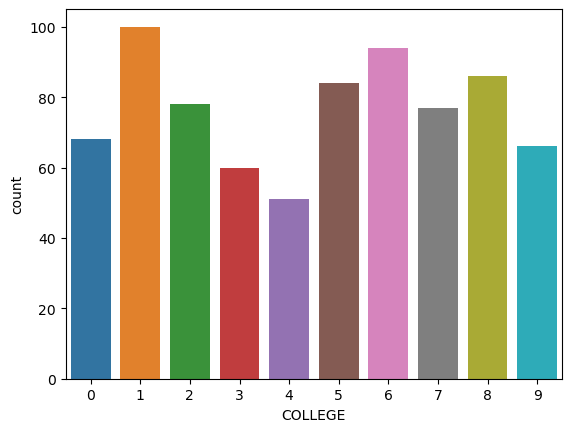

In [114]:
sns.countplot(x=df['COLLEGE'])

In [115]:
label_mapping

{'Dr. Abdul Haq Unani Medical College, Kurnool': 0,
 'Dr. Allu Ramalingaiah Government Homoeo Medical College, Rajahmundry': 1,
 'Dr. Gururaj Government Homoeo Medical College, Gudivada': 2,
 'Government Homoeo Medical College, Kadapa': 3,
 'KKC Homoeopathy Medical College, Parameswara Mangalam, Puttur, Chittoor District.': 4,
 'Maharaja Institute of Homoeo Medical College, Vizianagaram.': 5,
 'NRS Government Ayurvedic College, Vijayawada': 6,
 'Sri Adi Shiva Sadguru Ali Saheb Shivaaryula Homoeopathic Medical College, Guntakal.': 7,
 'Sri Adi Siva Sadguru Ali Saheb Shivaaryula Ayurvedic Medical College and Research Centre, Guntakal': 8,
 'Sri Venkateswara Ayurvedic College, Tirupati': 9}

In [116]:
from sklearn.preprocessing import KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=75, encode='ordinal', strategy='uniform')

# Fit and transform the continuous column
df['discrete_column'] = discretizer.fit_transform(df[['RANK']])

# Print the DataFrame with the discretized column
print(df)

     COLLEGE     RANK  SX  CAT  LOC  PHASE  discrete_column
0          6    88452   0    3    0      0              0.0
1          6   106390   0    5    0      0              1.0
2          6   116220   0    1    3      0              2.0
3          6   119753   1    5    0      0              2.0
4          6   120672   0    3    0      0              2.0
..       ...      ...  ..  ...  ...    ...              ...
759        0   839668   1    6    3      1             52.0
760        0   839804   1    6    3      1             52.0
761        0   970100   0    0    0      1             61.0
762        0  1016135   0    6    3      1             64.0
763        0  1056193   1    6    3      1             67.0

[764 rows x 7 columns]


/Users/namanmuktha/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [117]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=420)

In [118]:
X=df.drop(['COLLEGE'],axis=1)
y=df['COLLEGE']

In [119]:
X_resampled, y_resampled = oversampler.fit_resample(X,y)

In [120]:
df_updated=X_resampled

In [121]:
df_updated['COLLEGE']=y_resampled

In [122]:
df_updated.head()

,RANK,SX,CAT,LOC,PHASE,discrete_column,COLLEGE
0,88452,0,3,0,0,0.0,6
1,106390,0,5,0,0,1.0,6
2,116220,0,1,3,0,2.0,6
3,119753,1,5,0,0,2.0,6
4,120672,0,3,0,0,2.0,6


In [123]:
#

<Axes: xlabel='COLLEGE', ylabel='count'>

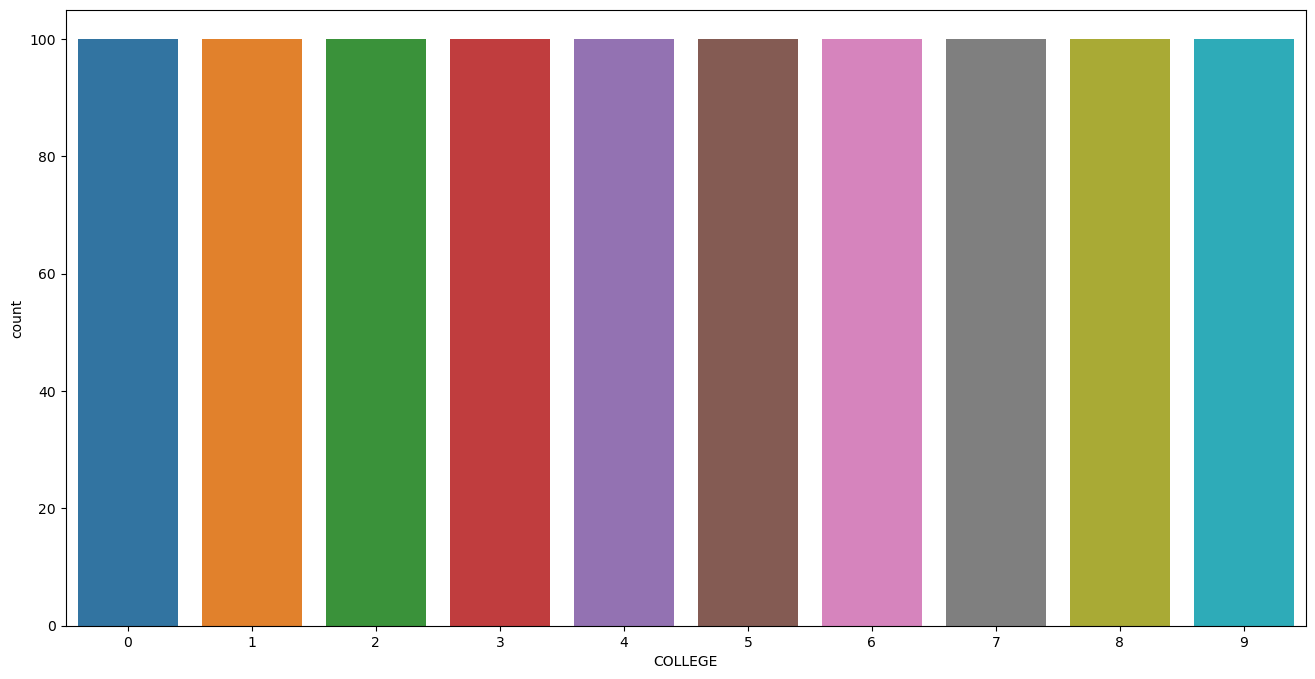

In [124]:
plt.figure(figsize=(16, 8))
sns.countplot(x=df_updated['COLLEGE'])

In [125]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(df_updated.drop(["COLLEGE"],axis=1),df_updated["COLLEGE"],test_size=0.2,random_state=231)

In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_p_1=rfc.predict(X_test)
print(accuracy_score(y_p_1,y_test)*100)
print(confusion_matrix(y_p_1,y_test))
print(classification_report(y_p_1,y_test))

82.5
[[20  0  0  0  0  0  0  1  0  0]
 [ 0 16  4  0  0  1  0  0  1  0]
 [ 1  5 17  0  0  1  2  1  0  0]
 [ 0  1  0 15  2  0  0  1  2  0]
 [ 0  0  0  1 15  0  0  2  1  0]
 [ 0  1  0  1  0 15  0  0  0  0]
 [ 0  0  1  0  0  1 19  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 1  0  1  0  0  0  0  0 14  0]
 [ 0  0  2  0  0  0  0  0  0 19]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.70      0.73      0.71        22
           2       0.68      0.63      0.65        27
           3       0.88      0.71      0.79        21
           4       0.88      0.79      0.83        19
           5       0.83      0.88      0.86        17
           6       0.90      0.90      0.90        21
           7       0.75      1.00      0.86        15
           8       0.78      0.88      0.82        16
           9       1.00      0.90      0.95        21

    accuracy                           0.82       200
   macro avg  

In [127]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_p=dt.predict(X_test)
print(accuracy_score(y_p,y_test))
print(classification_report(y_p,y_test))

0.795
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        20
           1       0.70      0.76      0.73        21
           2       0.68      0.61      0.64        28
           3       0.82      0.78      0.80        18
           4       0.88      0.68      0.77        22
           5       0.83      0.79      0.81        19
           6       0.86      0.86      0.86        21
           7       0.60      0.80      0.69        15
           8       0.83      0.94      0.88        16
           9       1.00      0.95      0.97        20

    accuracy                           0.80       200
   macro avg       0.80      0.81      0.80       200
weighted avg       0.80      0.80      0.79       200



In [128]:
y_p

array([9, 2, 8, 3, 5, 5, 3, 1, 4, 7, 8, 9, 7, 0, 5, 6, 6, 0, 9, 7, 8, 2,
       2, 4, 6, 4, 2, 9, 2, 8, 4, 0, 1, 2, 4, 5, 1, 0, 7, 9, 8, 2, 6, 6,
       6, 7, 3, 0, 0, 3, 4, 5, 6, 6, 5, 9, 9, 3, 9, 9, 4, 7, 2, 5, 1, 3,
       3, 1, 4, 2, 7, 1, 4, 6, 4, 3, 5, 1, 9, 4, 3, 3, 6, 9, 9, 7, 8, 9,
       1, 2, 4, 8, 0, 6, 9, 5, 2, 6, 2, 5, 2, 5, 0, 9, 6, 4, 3, 1, 0, 4,
       1, 8, 9, 1, 6, 6, 0, 5, 0, 5, 4, 3, 0, 4, 8, 7, 1, 1, 3, 6, 1, 7,
       2, 0, 8, 2, 3, 5, 4, 2, 2, 5, 1, 2, 2, 9, 2, 8, 5, 4, 8, 3, 7, 4,
       1, 2, 9, 6, 6, 3, 0, 2, 0, 4, 8, 9, 1, 9, 7, 0, 2, 5, 3, 5, 7, 4,
       8, 2, 2, 1, 0, 8, 1, 0, 6, 0, 5, 1, 6, 2, 0, 7, 1, 3, 4, 8, 2, 2,
       6, 7])

In [129]:
y_test

110    9
637    5
87     8
428    8
672    5
      ..
420    8
496    1
171    2
385    6
708    7
Name: COLLEGE, Length: 200, dtype: int64

In [130]:
y_p_1

array([9, 2, 8, 3, 5, 5, 3, 1, 4, 7, 3, 9, 7, 0, 1, 6, 9, 0, 9, 7, 8, 2,
       2, 4, 6, 7, 2, 9, 2, 8, 4, 0, 1, 0, 4, 5, 1, 1, 7, 9, 8, 2, 6, 6,
       6, 0, 3, 0, 0, 3, 4, 5, 6, 6, 5, 9, 9, 3, 9, 9, 7, 0, 2, 5, 5, 3,
       3, 1, 4, 2, 7, 6, 4, 6, 4, 3, 5, 1, 9, 4, 3, 3, 6, 9, 6, 7, 8, 9,
       1, 2, 4, 8, 0, 6, 9, 5, 2, 6, 2, 5, 2, 5, 0, 9, 6, 4, 3, 1, 0, 4,
       1, 8, 9, 1, 6, 9, 0, 5, 0, 5, 7, 3, 0, 4, 8, 7, 1, 1, 3, 6, 1, 7,
       2, 0, 8, 2, 3, 1, 4, 1, 2, 5, 1, 2, 2, 9, 2, 8, 5, 4, 8, 3, 7, 4,
       1, 2, 9, 6, 6, 3, 0, 2, 0, 4, 8, 9, 1, 9, 7, 3, 2, 2, 3, 5, 7, 4,
       8, 2, 2, 1, 0, 8, 3, 0, 6, 0, 5, 1, 6, 2, 0, 8, 1, 3, 4, 8, 2, 2,
       6, 7])

In [131]:
y_test

110    9
637    5
87     8
428    8
672    5
      ..
420    8
496    1
171    2
385    6
708    7
Name: COLLEGE, Length: 200, dtype: int64